In [1]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
    print("Uploaded file name:", filename)

    df = pd.read_excel(io.BytesIO(uploaded[filename]))

df.head()

Saving bank-full.xlsx to bank-full.xlsx
Uploaded file name: bank-full.xlsx


,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


✅ Accuracy: 0.8288178701758266

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      7952
           1       0.31      0.34      0.32      1091

    accuracy                           0.83      9043
   macro avg       0.61      0.62      0.61      9043
weighted avg       0.84      0.83      0.83      9043



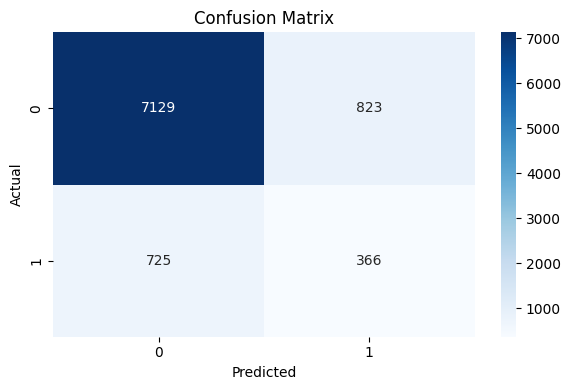

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df_raw = pd.read_excel("bank-full.xlsx", header=None)
df = df_raw[0].str.split(';', expand=True)
df.columns = [col.strip().replace('"', '') for col in df.iloc[0]]
df = df.drop(index=0).reset_index(drop=True)

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(lambda x: x.strip().replace('"', '') if isinstance(x, str) else x)

df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()